In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

2025-07-20 06:02:46.189047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-20 06:02:46.189099: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
# check the shape of the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5

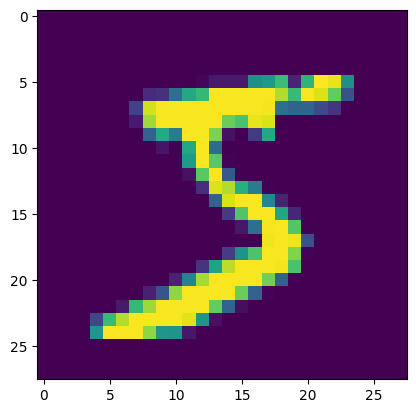

In [7]:
# this is our train and test data in the dataset
plt.imshow(X_train[0])
y_train[0]

In [8]:
# scaling our data (converting our data values between 0 and 1 by dividing with 255)
X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()

2025-07-20 06:03:08.538942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-07-20 06:03:08.538994: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2025-07-20 06:03:08.539030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aarathi): /proc/driver/nvidia/version does not exist
2025-07-20 06:03:08.556778: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax')) 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = 'Adam',loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size = 64,epochs = 20,verbose = 1,validation_split = 0.2)

2025-07-20 06:03:14.621516: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/20
746/750 [============================>.] - ETA: 0s - loss: 0.3273 - accuracy: 0.9083   

2025-07-20 06:03:20.135127: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37632000 exceeds 10% of free system memory.


750/750 [==============================] - 5s 5ms/step - loss: 0.3266 - accuracy: 0.9085 - val_loss: 0.1747 - val_accuracy: 0.9515
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1450 - accuracy: 0.9570 - val_loss: 0.1300 - val_accuracy: 0.9641
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1024 - accuracy: 0.9696 - val_loss: 0.1095 - val_accuracy: 0.9688
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0771 - accuracy: 0.9772 - val_loss: 0.1047 - val_accuracy: 0.9690
Epoch 5/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0604 - accuracy: 0.9826 - val_loss: 0.0883 - val_accuracy: 0.9737
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0491 - accuracy: 0.9855 - val_loss: 0.0907 - val_accuracy: 0.9722
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0381 - accuracy: 0.9893 - val_loss: 0.0863 - val_accuracy: 0.9744
Epoch 8/20
750/75

In [13]:
model.evaluate(X_test,y_test)

 17/313 [>.............................] - ETA: 0s - loss: 0.0346 - accuracy: 0.9908     

2025-07-20 06:04:38.541462: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.0956 - accuracy: 0.9775


[0.09562806040048599, 0.9775000214576721]

In [14]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[2.3144634e-11, 1.1073349e-13, 3.1793739e-08, ..., 9.9952674e-01,
        6.8619119e-09, 9.4764445e-08],
       [1.1294935e-14, 1.8715416e-11, 9.9999994e-01, ..., 2.8275722e-20,
        7.5392563e-09, 3.6143547e-20],
       [1.1030488e-09, 9.9989218e-01, 3.9146385e-06, ..., 2.4727784e-05,
        7.8655437e-05, 7.0876929e-11],
       ...,
       [2.5920523e-22, 3.8958683e-15, 1.4417338e-19, ..., 2.8979595e-11,
        4.1698631e-11, 3.4071089e-08],
       [5.8972435e-16, 8.3202369e-20, 8.3305269e-20, ..., 2.2928481e-15,
        9.8284238e-07, 9.6287430e-18],
       [1.9906344e-11, 9.6268388e-18, 3.3128250e-11, ..., 1.7093486e-17,
        4.0281560e-14, 6.1865566e-17]], dtype=float32)

In [15]:
predicted_classes = predictions.argmax(axis = -1)
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

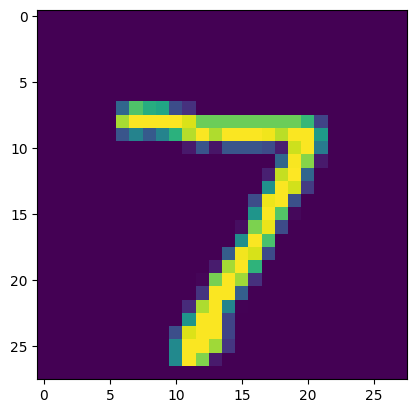

In [20]:
plt.imshow(X_test[0])

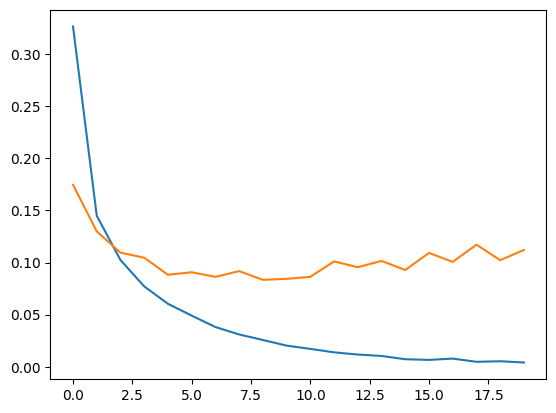

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

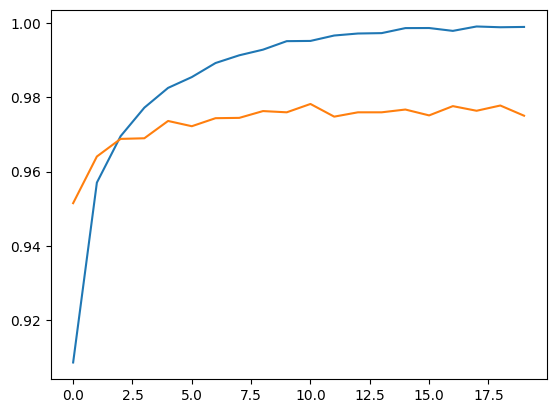

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])